In [1]:
using Revise, LinearAlgebra, BlockArrays, Statistics, PyPlot
includet("hw1_functions.jl")

In [2]:
function barbell(n)
    W1 = Float64.(ones(n,n) - I)
    W = BlockArray{Float64}(undef_blocks, [n,n], [n,n])
    setblock!(W,W1,1,1)
    setblock!(W,W1,2,2)
    setblock!(W,zeros(n,n),1,2)
    setblock!(W,zeros(n,n),2,1)
    W = Array(W)
    W[1,2*n], W[2*n,1] = 1.0, 1.0;

    return  Graph(W)
end

exponential(r) = -log(rand())/r     # sampler for exponential distribution of rate r (inverse cumulative method)
∂(A,i) = A.rowval[nzrange(A,i)]     # returns the out neighbours of node i

function french_de_groot(P, x0, T; stats = (t,x)->println("$t $x"), ϵ=1e-6)
    stop(x,X,eps) = (norm(x-X)/norm(X) ≤ eps)
    N = length(x0)

    function simulation(P, x0, T, stats, ϵ)
        x = x0
        t = 0

        while true
            x0 = x
            x = P*x0
            t += 1
            stats(t,x)
            (stop(x,x0,ϵ) || t≥T) && break
        end
        return t
    end
    return simulation(P, x0, T, stats, ϵ)
end

french_de_groot (generic function with 1 method)

[50, 100, 150, 200, 250, 300, 350, 400]
[5, 5, 4, 4, 4, 4, 4, 4]


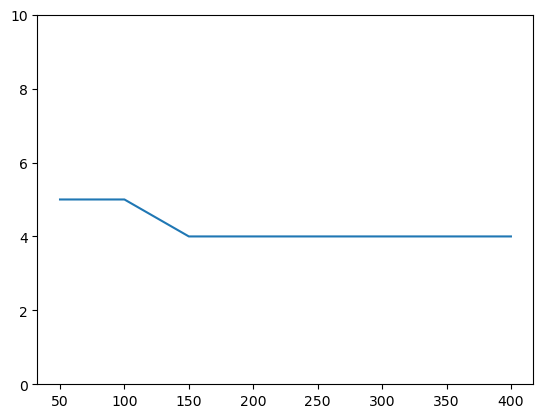

In [4]:
nstart = 6
nstop = 10
niter = 100
T = 1e3

# nn = [2^i for i in nstart:nstop]
nn_x = [50; 100; 150; 200; 250; 300; 350; 400]
tt_x = Vector{Int}(undef,length(nn_x))

function do_nothing(t,x)
    return nothing
end

for n in nn_x
    G = barbell(n)
    times_abs = Vector{Int}(undef,niter)
    x_in = [(mod(i,2)==0 ? 0 : 1) for i in 1:2*n]

    tt_x[searchsortedfirst(nn_x,n)] = french_de_groot(G.P, x_in, T, stats=do_nothing)
end

println(nn_x)
println(tt_x)
plot(nn_x,tt_x)
ylim([0,10])
gcf()

In [7]:
nstart = 6
nstop = 8
niter = 100
T = 1e6

# nn = [2^i for i in nstart:nstop]
nn_y = [50; 100; 150; 200; 250; 300; 350; 400; 450; 500; 550; 600; 650; 700]
tt_y = Vector{Int}(undef,length(nn_y))

function do_nothing(t,x)
    return nothing
end

for n in nn_y
    G = barbell(n)
    times_abs = Vector{Int}(undef,niter)
    y_in = [ones(n); zeros(n)]

    tt_y[searchsortedfirst(nn_y,n)] = french_de_groot(G.P, y_in, T, stats=do_nothing)
end

println(nn_y)
println(tt_y)
a = tt_y./((nn_y./2).^2)
println(a)

close("all")
plot(nn_y,tt_y)
gcf()